In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob
import pandas as pd

path_list=glob.glob("frames_video1/*")
path1=path_list[0]
cam = cv.VideoCapture('videos/20250528_170906-003.mp4')
fps = cam.get(cv.CAP_PROP_FPS)
cam.release()
# fps
dt=1/fps
t=np.array([dt*x for x in range(len(path_list))])
# path_list
plt.style.use('ggplot')


In [6]:
df=pd.read_csv('peltier_cosas/peltiermod1.csv')
df.columns= ['t','temp']
df=df[:len(t)]

In [ ]:
# %%script false --no-raise-error

# img1 = cv.imread(path1)
# img1 = img1[314:1924, 1459:3228]
r,g,b=np.zeros(shape=(3,t.shape[0]))

# size=np.size(img1)



for j,i in enumerate(path_list):
    img = cv.imread(i)
    img = 255-img

    img=img[315:1871,1523:3291,:]
 


    r[j] = np.sum(img[:,:,0])/np.size(img)

    g[j] = np.sum(img[:,:,1])/np.size(img)
    
    b[j] = np.sum(img[:,:,2])/np.size(img)




df_video1=pd.DataFrame({'t':t,'r':r,'g':g,'b':b})
df_video1.to_csv('procesados/video1_rgb_surface.csv',index=False)


In [ ]:
df_video1=pd.read_csv('procesados/video1_rgb_sliced.csv')

In [ ]:
intensidad=(df_video1['r']**2+df_video1['g']**2+df_video1['b']**2)**.5

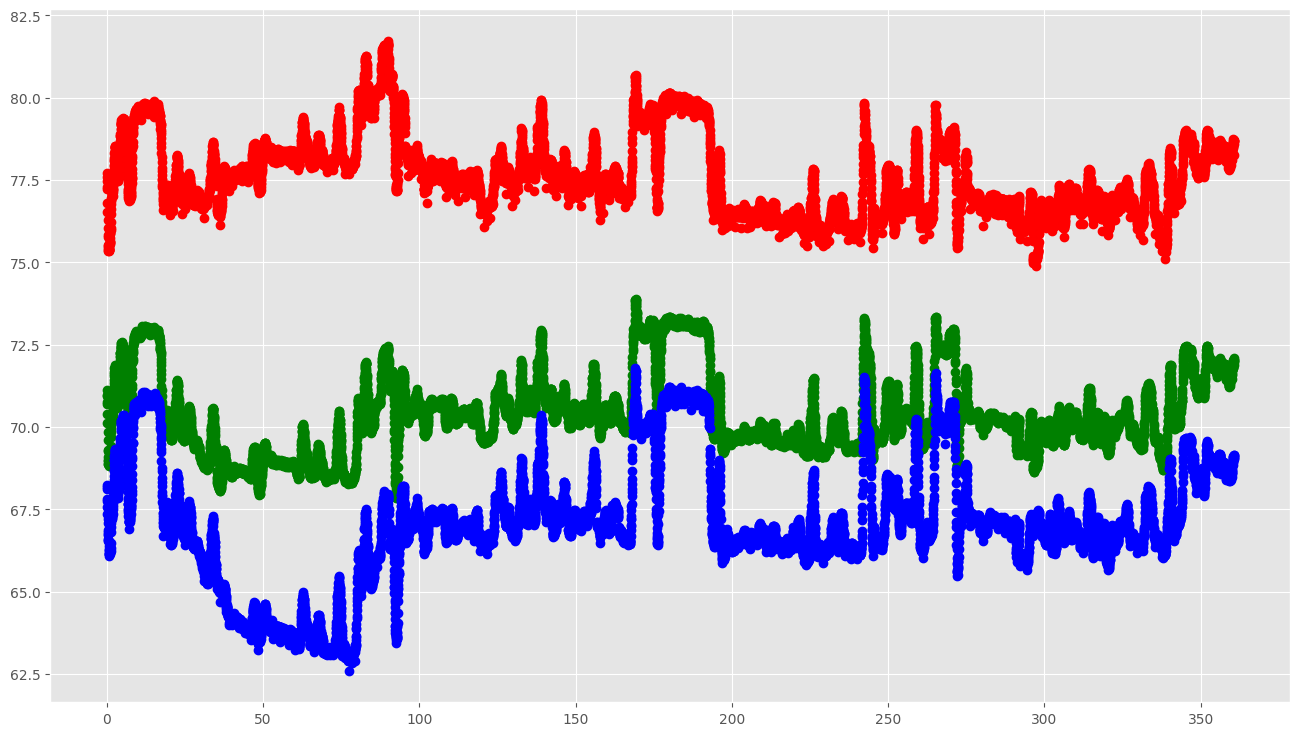

In [ ]:
cut=len(df_video1['r'])
salto=1
dashdash=''


plt.figure(figsize=(16,9))

plt.plot(t,df_video1['r'][:cut:salto],'ro'+dashdash)
plt.plot(t,df_video1['g'][:cut:salto],'go'+dashdash)
plt.plot(t,df_video1['b'][:cut:salto],'bo'+dashdash)

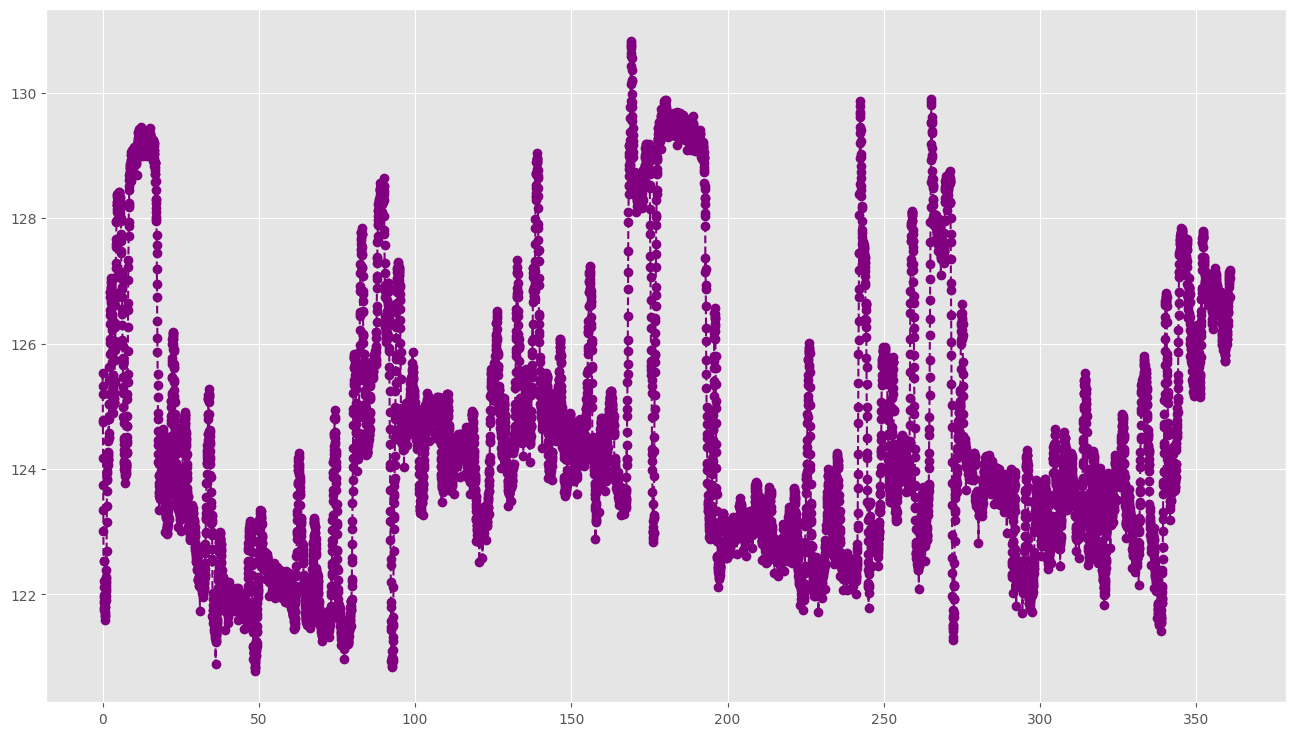

In [ ]:
plt.figure(figsize=(16,9))

plt.plot(t,intensidad,'o--',color='purple')

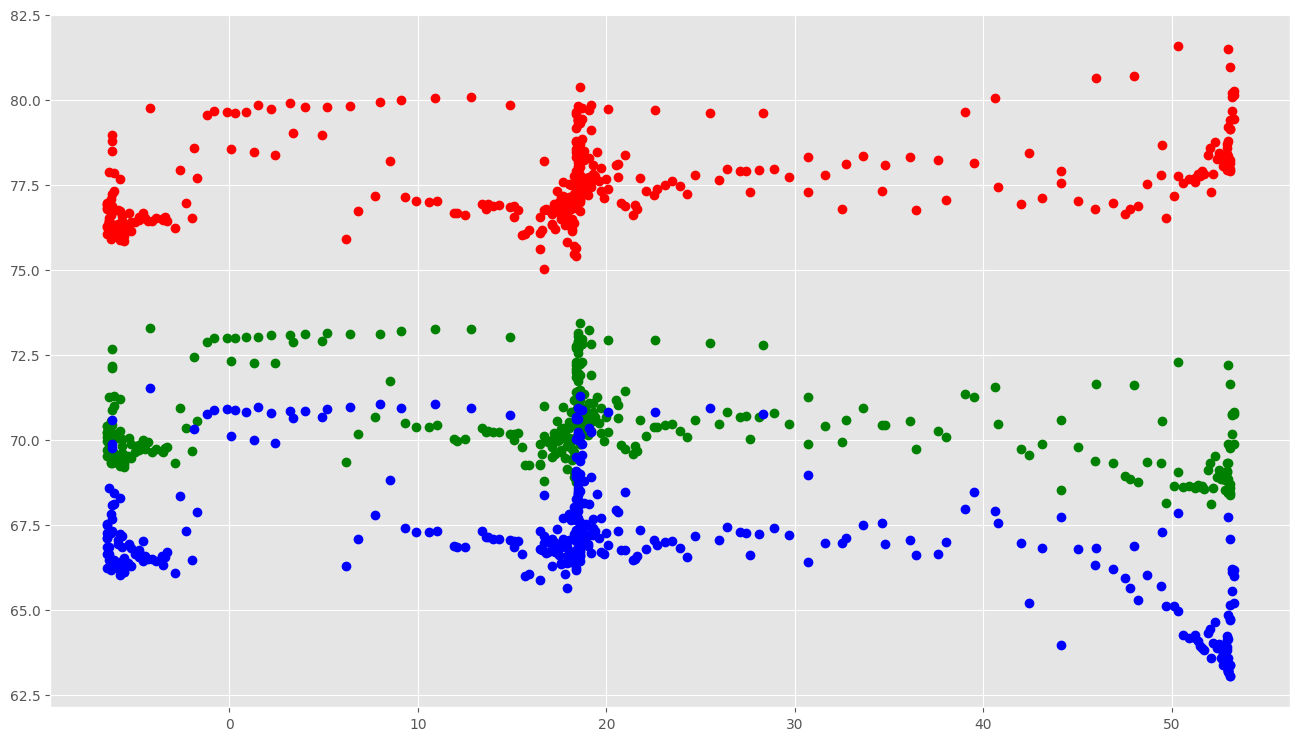

In [ ]:
cut=len(df['temp'])
salto=29
dashdash=''


plt.figure(figsize=(16,9))

plt.plot(df['temp'],df_video1['r'][::salto][:cut],'ro'+dashdash)
plt.plot(df['temp'],df_video1['g'][::salto][:cut],'go'+dashdash)
plt.plot(df['temp'],df_video1['b'][::salto][:cut],'bo'+dashdash)

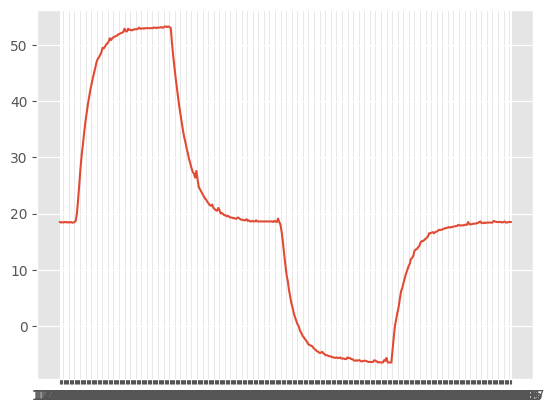

In [ ]:
plt.plot(df['t'],df['temp'])

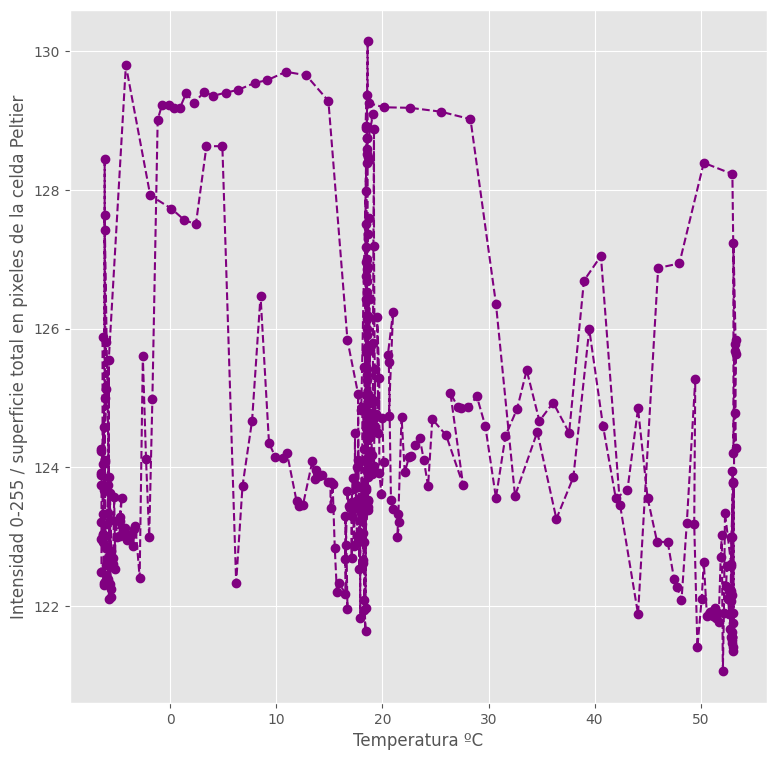

In [ ]:
plt.figure(figsize=(9,9))

plt.xlabel('Temperatura ºC')
plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')

color=''
dashdash='--'
plt.plot(df['temp'],intensidad[::salto][:cut],color+'o'+dashdash,color='purple')


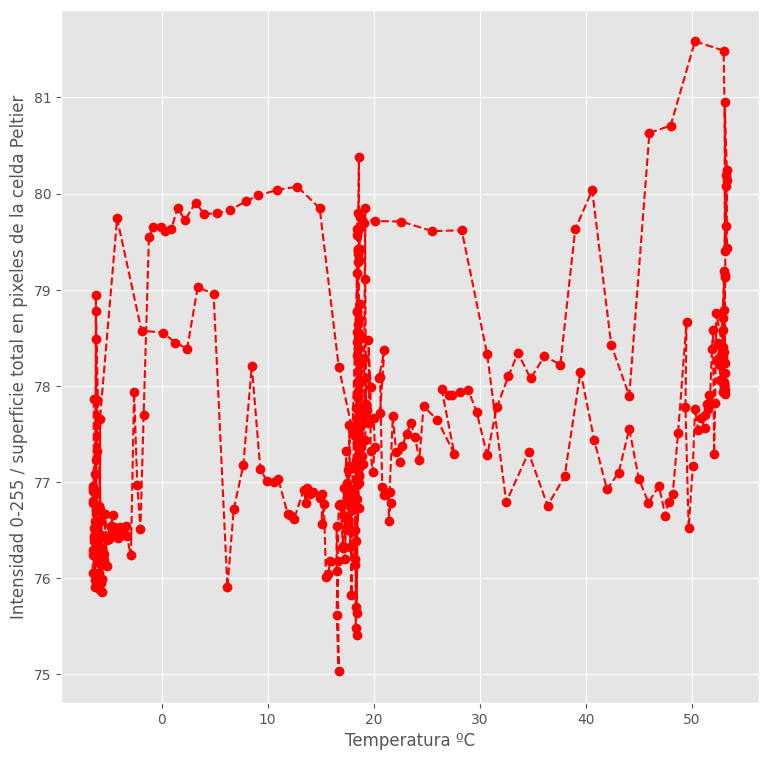

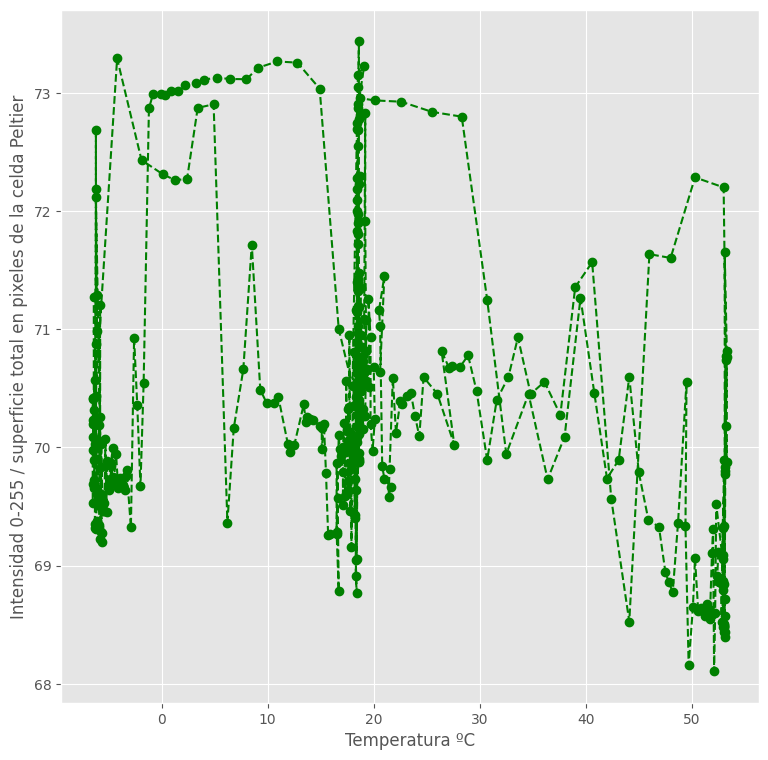

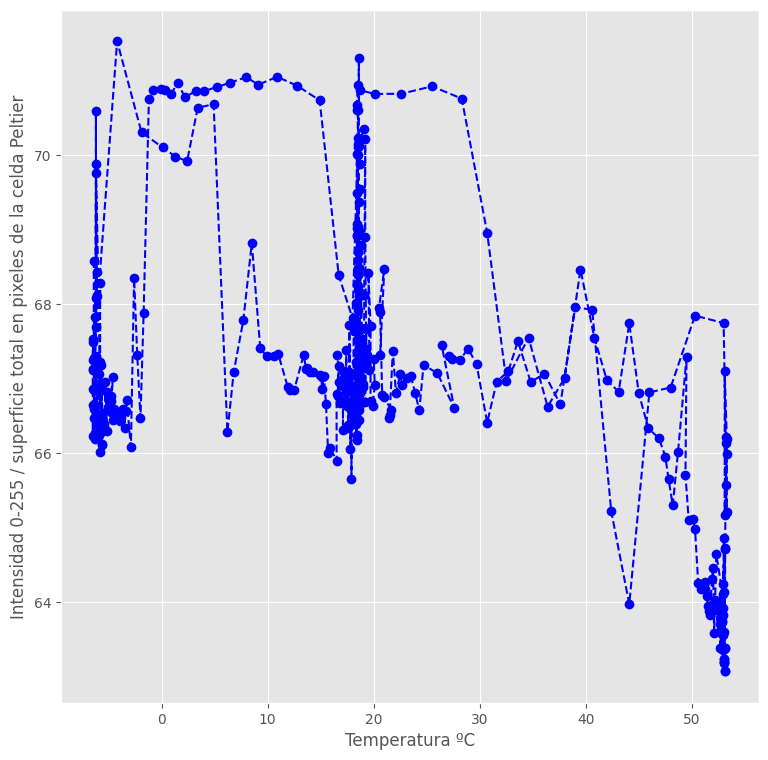

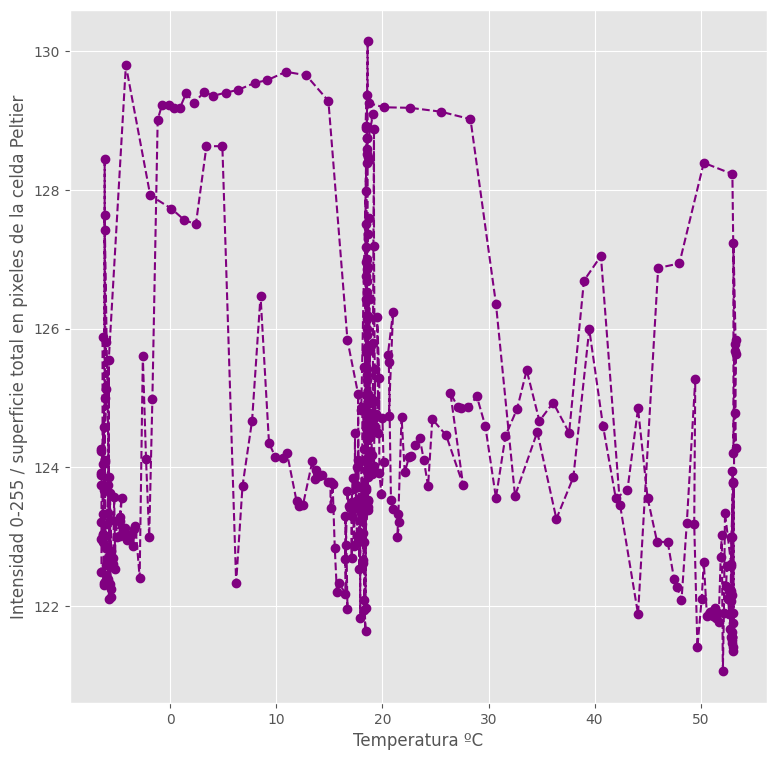

In [ ]:
cut=len(df['temp'])
salto=29
for i in ['r','g','b']:
    plt.figure(figsize=(9,9))

    plt.xlabel('Temperatura ºC')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')

    color=i
    dashdash='--'
    plt.plot(df['temp'],df_video1[color][::salto][:cut],color+'o'+dashdash)
    
plt.figure(figsize=(9,9))

plt.xlabel('Temperatura ºC')
plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')

color=''
dashdash='--'
plt.plot(df['temp'],intensidad[::salto][:cut],color+'o'+dashdash,color='purple')